### Traffic sign recognition
The code document for "**Empowering full self driving with Deep learning (FSD): Empowering full self drive with Deep Learning**"

The docuemnt includes:


1.   Data importing
2.   Data prepreperation pipeline
3.   Model configuration
4.   Model training
5.   Evaluation
6.   Practical testing





Cloning Git repo containing traffic signs

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 7.10 MiB/s, done.
Updating files: 100% (4/4), done.


Package imports

In [2]:
import pickle
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Loading class names

In [3]:
class_names = np.genfromtxt('/content/german-traffic-signs/signnames.csv', skip_header=1, dtype='str', delimiter=',')

Loading pickled data - images are in a pickle format so need to be loaded into the environment using pickle

In [4]:
with open('/content/german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)

with open('/content/german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

with open('/content/german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

Extracting features and lables from the pickled data

In [5]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

Normalise the pixel values between 0-1

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

Train test split process

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Defining the CNN (Sequential mdoel)

In [8]:
model = models.Sequential()

Layers for the model

In [9]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Flatten layer to transition from conv to dense layers

In [10]:
model.add(layers.Flatten())

Dense layers

In [11]:
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))  # 43 classes for GTSRB

Compile the model

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Moldel summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Train the model

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
870/870 [==============================] - 14s 6ms/step - loss: 1.0884 - accuracy: 0.6941 - val_loss: 0.3036 - val_accuracy: 0.9132
Epoch 2/10
870/870 [==============================] - 5s 6ms/step - loss: 0.1665 - accuracy: 0.9545 - val_loss: 0.1337 - val_accuracy: 0.9718
Epoch 3/10
870/870 [==============================] - 4s 5ms/step - loss: 0.0826 - accuracy: 0.9786 - val_loss: 0.1111 - val_accuracy: 0.9753
Epoch 4/10
870/870 [==============================] - 4s 5ms/step - loss: 0.0580 - accuracy: 0.9843 - val_loss: 0.1059 - val_accuracy: 0.9770
Epoch 5/10
870/870 [==============================] - 5s 6ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.0872 - val_accuracy: 0.9841
Epoch 6/10
870/870 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9920 - val_loss: 0.0951 - val_accuracy: 0.9805
Epoch 7/10
870/870 [==============================] - 4s 5ms/step - loss: 0.0282 - accuracy: 0.9918 - val_loss: 0.0774 - val_accuracy: 0.9885
Epoch

### Evaluation

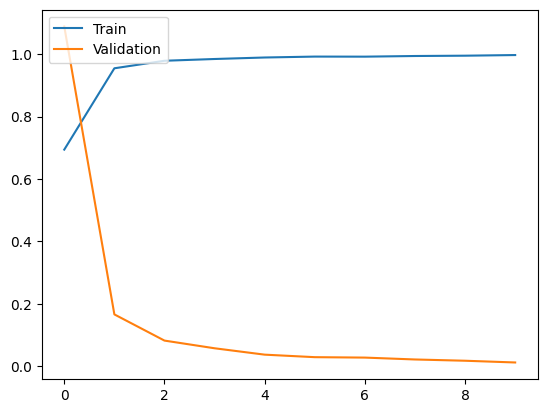

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['Train', 'Validation'], loc='upper left')

Evaluate the model on the test set

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: {}%'.format(np.round(test_accuracy * 100, 2)))

395/395 [==============================] - 2s 4ms/step - loss: 0.3960 - accuracy: 0.9397
Test Accuracy: 93.97%


Calculating recall score

*Recall = True Positives+False Negatives /True Positives*

Also known as sensitivity or true positivity rate
​


In [20]:
from sklearn.metrics import recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

recall_per_class = recall_score(y_test, y_pred_classes, average=None)

for class_idx, recall in enumerate(recall_per_class):
    class_name = class_names[class_idx]
    print('Recall for {}: {}'.format(class_name, round(recall, 3)))


395/395 [==============================] - 1s 2ms/step
Recall for Speed limit (20km/h): 0.783
Recall for Speed limit (30km/h): 0.971
Recall for Speed limit (50km/h): 0.967
Recall for Speed limit (60km/h): 0.958
Recall for Speed limit (70km/h): 0.953
Recall for Speed limit (80km/h): 0.914
Recall for End of speed limit (80km/h): 0.72
Recall for Speed limit (100km/h): 0.942
Recall for Speed limit (120km/h): 0.931
Recall for No passing: 0.977
Recall for No passing for vechiles over 3.5 metric tons: 0.986
Recall for Right-of-way at the next intersection: 0.931
Recall for Priority road: 0.952
Recall for Yield: 0.993
Recall for Stop: 1.0
Recall for No vechiles: 0.981
Recall for Vechiles over 3.5 metric tons prohibited: 0.98
Recall for No entry: 0.978
Recall for General caution: 0.854
Recall for Dangerous curve to the left: 0.9
Recall for Dangerous curve to the right: 0.989
Recall for Double curve: 0.611
Recall for Bumpy road: 0.883
Recall for Slippery road: 0.98
Recall for Road narrows on the

### Making predictions

1/1 [==============================] - 0s 100ms/step


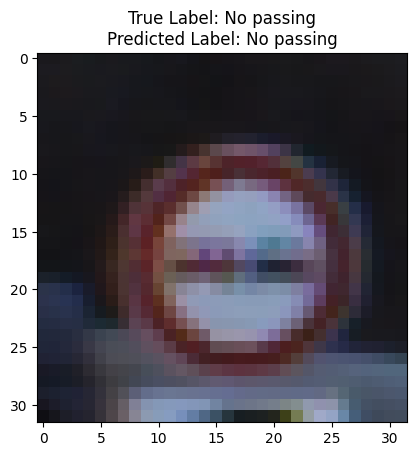

In [18]:
# Load class names from signnames.csv - this is so that the indexes for the labels can be mapped to the actual text
class_names_df = pd.read_csv('/content/german-traffic-signs/signnames.csv')
class_names = class_names_df['SignName'].values

# Index from the test set to make predictions - using a random func to pick a new road sign every time this cel is ran
index = random.randint(0,999)

# Get the image and true label
sample_image = X_test[index]
true_label = y_test[index]

# Reshape the image to match the input shape expected by the model
input_image = np.expand_dims(sample_image, axis=0)

# Make a prediction using the trained model
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

# Display the image, true label, and predicted label with class names
plt.imshow(sample_image)
plt.title('True Label: {}\nPredicted Label: {}'.format(class_names[true_label], class_names[predicted_label]))
plt.show()